In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Fixed Values for Model

In [2]:
IA = 0 # deg
FZ = 500 # N

### Pacejka Fits

In [3]:
# Will need to redo fits at some point. I took took normal force as N for lat and kN for
# long. The fits still work, but having different inputs gets a bit confusing.

def lat_fit(data, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17):
    FZ = data[0]
    SA = data[1]
    IA = data[2]

    C = a0
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return ((D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V), B, C)

def long_fit(data, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13):
    FZ = data[0] / 1000
    SR = data[1]

    C = b0
    D = FZ * (b1 * FZ + b2)
    
    BCD = (b3 * FZ**2 + b4 * FZ) * np.exp(-1 * b5 * FZ)
    B = BCD / (C * D)
    H = b9 * FZ + b10

    E = (b6 * FZ**2 + b7 * FZ + b8) * (1 - b13 * np.sign(SR + H))

    V = b11 * FZ + b12
    Bx1 = B * (SR + H)

    return ((D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V), B, C)

### Comstock Equations

In [4]:
def com_lat(SA, SR, FX, FY, Cs):
    SR_adj = SR / 100
    SA_adj = SA * np.pi / 180
    return ((FX * FY) / np.sqrt(SR_adj**2 * FY**2 + FX**2 * (np.tan(SA_adj))**2)) * (np.sqrt((1 - SR_adj)**2 * (np.cos(SA_adj))**2 * FY**2 + (np.sin(SA_adj))**2 * Cs**2) / (Cs * np.cos(SA_adj)))
        
def com_long(SA, SR, FX, FY, Ca):
    SR_adj = SR / 100
    SA_adj = SA * np.pi / 180
    return ((FX * FY) / np.sqrt(SR_adj**2 * FY**2 + FX**2 * (np.tan(SA_adj))**2)) * (np.sqrt(SR_adj**2 * Ca**2 + (1 - SR_adj)**2 * (np.cos(SA_adj))**2 * FX**2) / Ca)

### Pacejka Fit Coefficients

In [5]:
front_lat = [0.349, -0.00115, 8.760, 730.300, 1745.322, 0.0139, -0.000277, 1.02025435, 0, 0, 0, 0, 0,  0, 0, 0.00362, -0.0143, -0.0116]

front_long = [0.46024966176377113, 4000.509873697152, 1097.1712081460967, 202.18848632159495, 100.8812198037175, -0.2557010431649166, 0.3066955241461764, 0.011822770671297778, -1.9521015799737094, 0, 0, 0, 0, 0]

rear_lat = [1.384, -0.0003117, -2.936, 668.1, 1599, 0.03877, 0.0003177, 0.6252, 0, 0, 0, 0, 0, 0, 0, 0.005249, 0.0508, -0.1956]

rear_long = [0.46024966176377113, 4000.509873697152, 1097.1712081460967, 202.18848632159495, 100.8812198037175, -0.2557010431649166, 0.3066955241461764, 0.011822770671297778, -1.9521015799737094, 0, 0, 0, 0, 0]

### Rear Tire

In [6]:
def comstock(SR, SA):
    FX_fit = long_fit([FZ, SR], *rear_long)
    FY_fit = lat_fit([FZ, SA, IA], *rear_lat)

    FX = FX_fit[0]
    FY = FY_fit[0]

    Ca = (long_fit([FZ, 1], *rear_long)[0] - long_fit([FZ, 0], *rear_long)[0]) * (180 / np.pi) # slip stiffness
    Cs = (lat_fit([FZ, 1, IA], *rear_lat)[0] - lat_fit([FZ, 0, IA], *rear_lat)[0]) * 100 # cornering stiffness
    
    # if abs(SR) < 1 and abs(SA) < 1:
    #     return (FX_fit, FY_fit)
    # elif abs(SA) < 1:
    #     return (com_long(SA, SR, FX, FY, Ca), FY_fit)
    # elif abs(SR) < 1:
    #     return (FX_fit, com_lat(SA, SR, FX, FY, Cs))
    # else:
    return (com_long(SA, SR, FX, FY, Ca), com_lat(SA, SR, FX, FY, Cs))

In [7]:
print("com_long:", comstock(20, 0)[0]) # SR, SA
print("com_lat:", comstock(0.5, 0)[1])
print("pacejka_long:", long_fit([FZ, 20], *rear_long))
print("pacejka_lat:", lat_fit([FZ, 1, IA], *rear_lat))

com_long: nan
com_lat: nan
pacejka_long: (945.1258206695546, 0.16100113973933844, 0.46024966176377113)
pacejka_lat: (369.4756168140086, -0.177890928673319, 1.384)


C:\Users\rober\AppData\Local\Temp\ipykernel_43400\1888322567.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return ((FX * FY) / np.sqrt(SR_adj**2 * FY**2 + FX**2 * (np.tan(SA_adj))**2)) * (np.sqrt(SR_adj**2 * Ca**2 + (1 - SR_adj)**2 * (np.cos(SA_adj))**2 * FX**2) / Ca)
C:\Users\rober\AppData\Local\Temp\ipykernel_43400\1888322567.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return ((FX * FY) / np.sqrt(SR_adj**2 * FY**2 + FX**2 * (np.tan(SA_adj))**2)) * (np.sqrt((1 - SR_adj)**2 * (np.cos(SA_adj))**2 * FY**2 + (np.sin(SA_adj))**2 * Cs**2) / (Cs * np.cos(SA_adj)))


### Rear Tire Plots

In [8]:
# Setup

model_SA_data = np.linspace(0, 90, 1000)
model_SR_data = np.linspace(0, 100, 1000)

SA, SR = np.meshgrid(model_SA_data, model_SR_data)

FX = comstock(SR, SA)[0]
FY = comstock(SR, SA)[1]

C:\Users\rober\AppData\Local\Temp\ipykernel_43400\1888322567.py:9: RuntimeWarning: invalid value encountered in true_divide
  return ((FX * FY) / np.sqrt(SR_adj**2 * FY**2 + FX**2 * (np.tan(SA_adj))**2)) * (np.sqrt(SR_adj**2 * Ca**2 + (1 - SR_adj)**2 * (np.cos(SA_adj))**2 * FX**2) / Ca)
C:\Users\rober\AppData\Local\Temp\ipykernel_43400\1888322567.py:4: RuntimeWarning: invalid value encountered in true_divide
  return ((FX * FY) / np.sqrt(SR_adj**2 * FY**2 + FX**2 * (np.tan(SA_adj))**2)) * (np.sqrt((1 - SR_adj)**2 * (np.cos(SA_adj))**2 * FY**2 + (np.sin(SA_adj))**2 * Cs**2) / (Cs * np.cos(SA_adj)))


C:\Users\rober\AppData\Local\Temp\ipykernel_43400\340818707.py:9: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(SR, SA, FY)


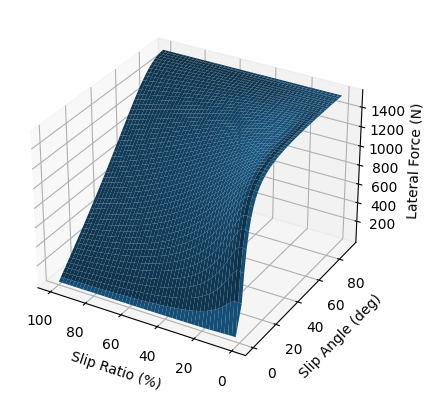

In [9]:
# Lat

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FY)

ax.set_xlabel('Slip Ratio (%)')
ax.set_ylabel('Slip Angle (deg)')
ax.set_zlabel('Lateral Force (N)')

ax.invert_xaxis()

C:\Users\rober\AppData\Local\Temp\ipykernel_43400\1661613769.py:9: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(SR, SA, FX)


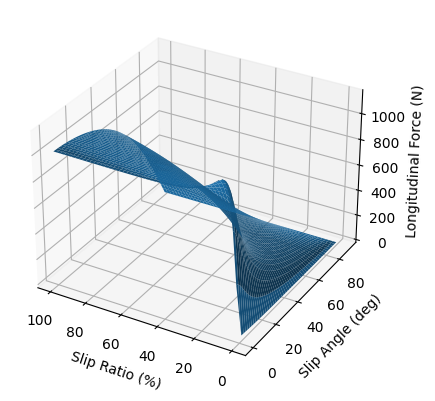

In [12]:
# Long

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

ax = plt.axes(projection='3d')

fig.add_axes(ax)
ax.plot_surface(SR, SA, FX)

ax.set_xlabel('Slip Ratio (%)')
ax.set_ylabel('Slip Angle (deg)')
ax.set_zlabel('Longitudinal Force (N)')
ax.invert_xaxis()